In [1]:
import statsmodels.api as sa
import scikit_posthocs as sp
import pandas as pd
import numpy as np
import os
import anndata

In [14]:
# case='unpaired'
case='paired'

# parent_dir = f'/home/tiyu/SCMBench/{case}'
parent_dir = '/mnt/nas/user/yixuan/Multiomics-benchmark-main/data/download'

# datasets = os.listdir(parent_dir)
datasets=['10x-Multiome-Pbmc10k-small', 'Chen-2019-small', 'Ma-2020-batch-53-small', 'Ma-2020-batch-54-small', 'Ma-2020-batch-55-small', 'Ma-2020-batch-56-small']
# datasets = ['Muto-2021-batch-1-small']
# datasets=['10x-Multiome-Pbmc10k-small']
# datasets = ['Muto-2021-batch-1-small', 'Muto-2021-batch-2-small', 'Muto-2021-batch-3-small', 'Muto-2021-batch-4-small', 'Muto-2021-batch-5-small','Yao-2021-small']


In [3]:
import pandas as pd
import numpy as np

whole_stat = pd.DataFrame()
# max_length = 25
for dataset in datasets:
    input_dataset = f'{parent_dir}/{dataset}/{dataset}-RNA.h5ad'
    data = anndata.read_h5ad(input_dataset)
    cell_types = data.obs["cell_type"].to_numpy()
    cell_types_list = set(list(cell_types))
    print(f'{dataset}: {cell_types_list}') 

    for cell_type in cell_types_list:
        try:
            dict_path = f'/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/{dataset}/marker_dict_{cell_type}.npy'
            stat_path = f'/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/{dataset}/np_median_{cell_type}.npy'
            
            dict = np.load(dict_path, allow_pickle=True).item()
            stat = np.load(stat_path)

            # Create a temporary DataFrame
            temp_df = pd.DataFrame({f'{dataset}_{cell_type}': stat}, index=dict.keys())
            # Merge with the main DataFrame
            whole_stat = whole_stat.join(temp_df, how='outer')
        except FileNotFoundError:
            continue

# Replace NaNs with zeros
whole_stat.fillna(0, inplace=True)


10x-Multiome-Pbmc10k-small: {'pDC', 'CD4 TCM', 'NK', 'HSPC', 'Naive B', 'CD8 TEM_1', 'CD4 TEM', 'CD8 Naive', 'CD14 Mono', 'Intermediate B', 'CD4 Naive', 'cDC', 'Memory B', 'CD8 TEM_2', 'MAIT', 'gdT', 'Plasma', 'Treg', 'CD16 Mono'}
Chen-2019-small: {'Endo', 'InP', 'OliI', 'E2Rasgrf2', 'E5Sulf1', 'E4Il1rapl2', 'E5Tshz2', 'Mic', 'Peri', 'E5Galnt14', 'E5Parm1', 'E3Rmst', 'Clau', 'InS', 'E6Tle4', 'OPC', 'E4Thsd7a', 'OliM', 'InN', 'Ast', 'InV', 'E3Rorb'}
Ma-2020-batch-53-small: {'Infundibulum', 'Dermal Sheath', 'ORS', 'Medulla', 'K6+ Bulge/Companion Layer', 'Hair Shaft-Cuticle/Cortex', 'Granular', 'Spinous', 'TAC-2', 'Schwann Cell', 'Macrophage DC', 'Isthmus', 'Basal', 'Dermal Papilla', 'alow CD34+ bulge', 'ahigh CD34+ bulge', 'Sebaceous Gland', 'Dermal Fibroblast', 'Endothelial', 'IRS', 'Melanocyte', 'TAC-1'}
Ma-2020-batch-54-small: {'Infundibulum', 'Dermal Sheath', 'ORS', 'Medulla', 'K6+ Bulge/Companion Layer', 'Hair Shaft-Cuticle/Cortex', 'Granular', 'Spinous', 'TAC-2', 'Schwann Cell', 'M

In [4]:
whole_stat

,10x-Multiome-Pbmc10k-small_pDC,10x-Multiome-Pbmc10k-small_CD4 TCM,10x-Multiome-Pbmc10k-small_NK,10x-Multiome-Pbmc10k-small_HSPC,10x-Multiome-Pbmc10k-small_Naive B,10x-Multiome-Pbmc10k-small_CD8 TEM_1,10x-Multiome-Pbmc10k-small_CD4 TEM,10x-Multiome-Pbmc10k-small_CD8 Naive,10x-Multiome-Pbmc10k-small_CD14 Mono,10x-Multiome-Pbmc10k-small_Intermediate B,...,Ma-2020-batch-56-small_Basal,Ma-2020-batch-56-small_Dermal Papilla,Ma-2020-batch-56-small_alow CD34+ bulge,Ma-2020-batch-56-small_ahigh CD34+ bulge,Ma-2020-batch-56-small_Sebaceous Gland,Ma-2020-batch-56-small_Dermal Fibroblast,Ma-2020-batch-56-small_Endothelial,Ma-2020-batch-56-small_IRS,Ma-2020-batch-56-small_Melanocyte,Ma-2020-batch-56-small_TAC-1
Cobolt,0.000000,0.869159,0.941748,1.0,1.0,0.626124,0.000000,0.886792,0.980198,0.687794,...,0.769912,0.234568,0.626016,0.652893,1.0,0.639344,0.481481,0.449275,1.0,0.680672
Deepmaps,0.005025,0.860505,0.886792,1.0,1.0,0.568652,0.526718,0.869159,0.980198,0.895777,...,0.538462,0.000000,0.739130,0.550388,1.0,0.801802,0.724138,0.212121,1.0,0.574803
GLUE,0.010101,0.904762,0.960784,1.0,1.0,0.666667,0.739130,0.941748,0.970491,0.923077,...,0.769912,0.739130,0.754386,0.680672,1.0,0.834862,0.785714,0.574803,0.0,0.834862
LIGER,0.010101,0.785714,0.923077,1.0,1.0,0.000000,0.724138,0.923077,0.980198,0.877976,...,0.754386,0.666667,0.709402,0.680672,1.0,0.851852,0.801802,0.503759,1.0,0.785714
MMD_MA,0.010101,0.869159,0.777813,1.0,1.0,0.632680,0.481481,0.754386,0.941748,0.666667,...,0.754386,0.360544,0.769912,0.709402,1.0,0.834862,0.481481,0.162791,0.0,0.834862
MOFA,0.000000,0.895777,0.941748,1.0,1.0,0.709402,0.724138,0.941748,0.980198,0.801802,...,0.785714,0.724138,0.739130,0.680672,1.0,0.818182,0.801802,0.587302,1.0,0.834862
PCA,0.005025,0.851852,0.869159,1.0,1.0,0.465221,0.562500,0.834862,0.932412,0.904762,...,0.709402,0.724138,0.834862,0.724138,1.0,0.851852,0.680672,0.526718,1.0,0.666667
Pamona,0.000000,0.709402,0.739130,1.0,0.0,0.052632,0.574803,0.709402,0.941748,0.716770,...,0.438849,0.639344,0.149425,0.041667,1.0,0.739130,0.785714,0.574803,1.0,0.587302
TotalVI,0.000000,0.801802,0.709402,1.0,1.0,0.408451,0.000000,0.777813,0.960784,0.932412,...,0.369863,0.000000,0.503759,0.481481,1.0,0.369863,0.000000,0.333333,1.0,0.550388
UCE,0.005025,0.904762,0.941748,1.0,1.0,0.626016,0.666667,0.951266,0.980198,0.923077,...,0.680672,0.724138,0.652893,0.639344,1.0,0.818182,0.785714,0.408451,0.0,0.785714


In [5]:
raw_data = whole_stat.transpose()
raw_data

,Cobolt,Deepmaps,GLUE,LIGER,MMD_MA,MOFA,PCA,Pamona,TotalVI,UCE,UnionCom,bindsc,iNMF,scGPT,scJoint,scMDC,scMoMaT,scVI,seurat4,seurat5
10x-Multiome-Pbmc10k-small_pDC,0.000000,0.005025,0.010101,0.010101,0.010101,0.000000,0.005025,0.000000,0.000000,0.005025,0.000000,0.005025,0.000000,0.000000,0.005025,0.000000,0.005025,0.005025,0.005025,0.010101
10x-Multiome-Pbmc10k-small_CD4 TCM,0.869159,0.860505,0.904762,0.785714,0.869159,0.895777,0.851852,0.709402,0.801802,0.904762,0.869159,0.869159,0.666667,0.877976,0.860505,0.886792,0.895777,0.843357,0.754386,0.877976
10x-Multiome-Pbmc10k-small_NK,0.941748,0.886792,0.960784,0.923077,0.777813,0.941748,0.869159,0.739130,0.709402,0.941748,0.941748,0.941748,0.851852,0.886792,0.941748,0.941748,0.923077,0.923077,0.941748,0.932412
10x-Multiome-Pbmc10k-small_HSPC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10x-Multiome-Pbmc10k-small_Naive B,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ma-2020-batch-56-small_Dermal Fibroblast,0.639344,0.801802,0.834862,0.851852,0.834862,0.818182,0.851852,0.739130,0.369863,0.818182,0.785714,0.834862,0.626016,0.265823,0.694915,0.666667,0.785714,0.801802,0.652893,0.000000
Ma-2020-batch-56-small_Endothelial,0.481481,0.724138,0.785714,0.801802,0.481481,0.801802,0.680672,0.785714,0.000000,0.785714,0.709402,0.754386,0.694915,0.234568,0.754386,0.739130,0.666667,0.754386,0.626016,0.000000
Ma-2020-batch-56-small_IRS,0.449275,0.212121,0.574803,0.503759,0.162791,0.587302,0.526718,0.574803,0.333333,0.408451,0.538462,0.574803,0.470588,0.000000,0.600000,0.550388,0.000000,0.574803,0.600000,0.000000
Ma-2020-batch-56-small_Melanocyte,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000


In [6]:
raw_data.columns[:]

Index(['Cobolt', 'Deepmaps', 'GLUE', 'LIGER', 'MMD_MA', 'MOFA', 'PCA',
       'Pamona', 'TotalVI', 'UCE', 'UnionCom', 'bindsc', 'iNMF', 'scGPT',
       'scJoint', 'scMDC', 'scMoMaT', 'scVI', 'seurat4', 'seurat5'],
      dtype='object')

In [7]:
import pandas as pd

def calculate_average_by_dataset(df):
    # Splitting the column names to extract the dataset prefix
    dataset_prefixes = df.columns.str.split('_', n=1).map(lambda x: x[0])

    # Creating an empty DataFrame to store the averages
    average_df = pd.DataFrame(index=df.index)

    # Iterating over each unique dataset prefix
    for prefix in dataset_prefixes.unique():
        # Selecting columns that belong to the current dataset
        columns = df.columns[dataset_prefixes == prefix]

        # Calculating the mean for these columns for each method
        average_df[prefix] = df[columns].mean(axis=1)

    return average_df

# Example usage:
# df = pd.read_csv('your_data.csv')  # Load your dataframe here
# averages = calculate_average_by_dataset(df)
# print(averages)


In [8]:
output = calculate_average_by_dataset(whole_stat)

In [9]:
output = output.T

In [10]:
output

,Cobolt,Deepmaps,GLUE,LIGER,MMD_MA,MOFA,PCA,Pamona,TotalVI,UCE,UnionCom,bindsc,iNMF,scGPT,scJoint,scMDC,scMoMaT,scVI,seurat4,seurat5
10x-Multiome-Pbmc10k-small,0.723990,0.772822,0.705230,0.725076,0.653513,0.808856,0.752727,0.558047,0.673323,0.794955,0.721954,0.747461,0.650031,0.730882,0.751842,0.729752,0.806250,0.698807,0.788648,0.799200
Chen-2019-small,0.579969,0.564279,0.569019,0.563897,0.561339,0.568517,0.626828,0.541331,0.449431,0.540479,0.579915,0.000000,0.495425,0.341604,0.592273,0.545253,0.536263,0.651218,0.542670,0.658824
Ma-2020-batch-53-small,0.605555,0.562005,0.614082,0.643761,0.567817,0.704451,0.630453,0.554198,0.569015,0.604463,0.741685,0.751920,0.618094,0.391986,0.652933,0.725584,0.680808,0.656835,0.705039,0.000000
Ma-2020-batch-54-small,0.602196,0.436197,0.671341,0.684677,0.646886,0.724991,0.606858,0.533595,0.720353,0.690050,0.700180,0.712662,0.558676,0.335930,0.715085,0.599058,0.660910,0.717389,0.526417,0.715597
Ma-2020-batch-55-small,0.654559,0.395064,0.715359,0.745659,0.642231,0.717949,0.551653,0.571707,0.675583,0.650473,0.649883,0.709237,0.622964,0.365506,0.648695,0.613654,0.655028,0.659178,0.640592,0.710783
Ma-2020-batch-56-small,0.679807,0.648153,0.637385,0.753432,0.579352,0.686448,0.664426,0.566328,0.522457,0.702508,0.756190,0.628939,0.680720,0.449780,0.676455,0.655289,0.686174,0.626930,0.666277,0.000000


In [11]:
average_values = output.mean()
average_values.values.shape

(20,)

In [12]:
output.loc[len(output)] = average_values.values

In [13]:
# output['average_values'] = average_values.values

In [15]:
output.to_csv(f'/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/{case}.csv')
# output.to_csv(f'/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/LLMs_{case}.csv')


In [16]:
dict_data={}
for i in raw_data.columns[1:]:
    dict_data[i]=raw_data[i].values

In [17]:

data = (
  pd.DataFrame(dict_data)
  .rename_axis('fold')
  .melt(
      var_name='datasets',
      value_name='score',
      ignore_index=False,
  )
  .reset_index()
)
data

,fold,datasets,score
0,0,Deepmaps,0.005025
1,1,Deepmaps,0.860505
2,2,Deepmaps,0.886792
3,3,Deepmaps,1.000000
4,4,Deepmaps,1.000000
...,...,...,...
2294,116,seurat5,0.000000
2295,117,seurat5,0.000000
2296,118,seurat5,0.000000
2297,119,seurat5,0.000000


In [18]:
avg_rank = data.groupby('fold').score.rank(pct=True).groupby(data.datasets).mean()
avg_rank

datasets
Deepmaps    0.421923
GLUE        0.712484
LIGER       0.584819
MMD_MA      0.533058
MOFA        0.731622
PCA         0.495433
Pamona      0.396042
TotalVI     0.415615
UCE         0.585254
UnionCom    0.593519
bindsc      0.559809
iNMF        0.390170
scGPT       0.299478
scJoint     0.668334
scMDC       0.481731
scMoMaT     0.496738
scVI        0.662462
seurat4     0.463245
seurat5     0.508264
Name: score, dtype: float64

In [19]:
import scipy.stats as ss
import matplotlib.pyplot as plt
ss.friedmanchisquare(*dict_data.values())

FriedmanchisquareResult(statistic=431.3431866078898, pvalue=2.6072115298497957e-80)

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7f19dca41c10>)

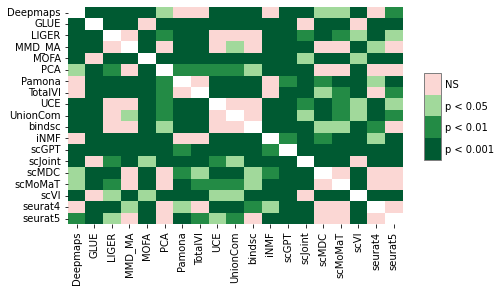

In [20]:
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='fold',
    group_col='datasets',
    y_col='score',
)
sp.sign_plot(test_results)

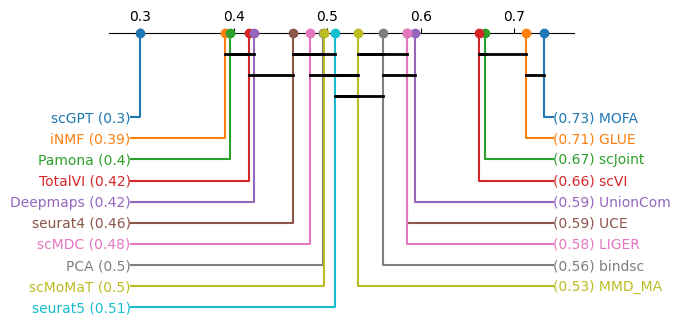

In [26]:
plt.figure(figsize=(6, 4), dpi=100)
# plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)
plt.savefig('/mnt/nas/user/yixuan/Multiomics-benchmark-main/evaluation/workflow/scripts/graphs/cdgraph_bio_'+case+'.eps', bbox_inches = 'tight')
